In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\AP\Desktop\StudentsPerformance.csv')

In [5]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [53]:
df.isnull().sum()/df.isnull().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


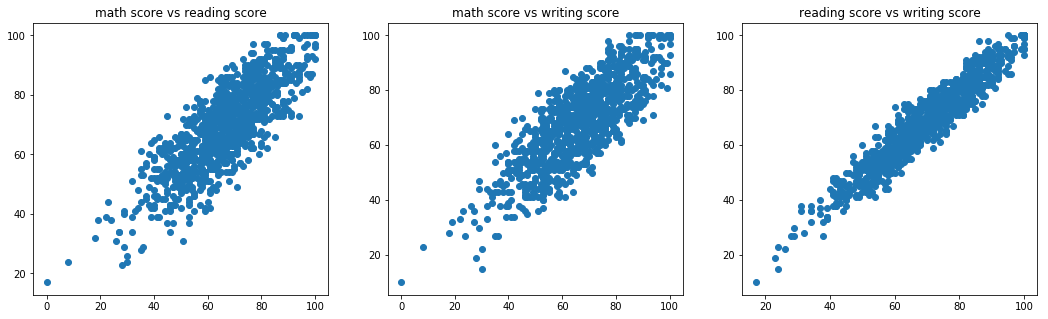

In [68]:
# scatter plot

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(df["math score"], df["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(df["math score"], df["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,3,3)
plt.scatter(df["reading score"], df["writing score"])
plt.title("reading score vs writing score");

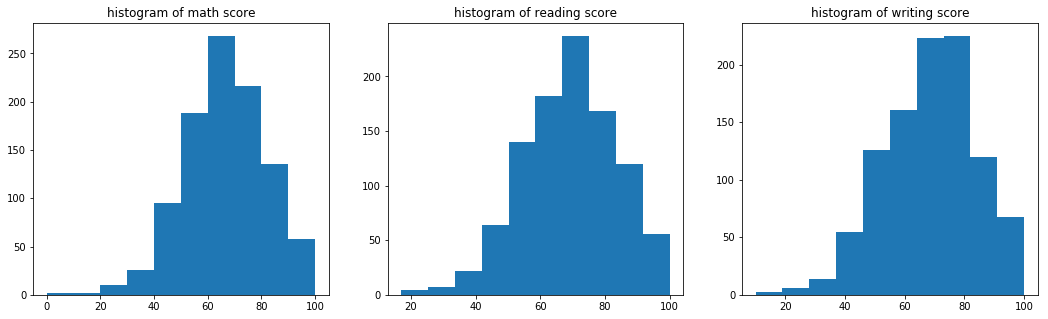

In [55]:
# distributions of scores

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(df["math score"])
plt.title("histogram of {}".format("math score"))

plt.subplot(1,3,2)
plt.hist(df["reading score"])
plt.title("histogram of {}".format("reading score"))

plt.subplot(1,3,3)
plt.hist(df["writing score"])
plt.title("histogram of {}".format("writing score"));

------------------------------

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

Gender

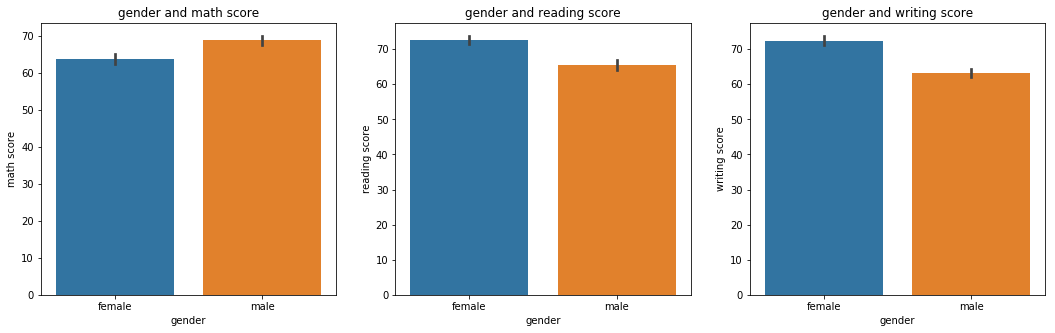

In [65]:
# box plot 

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["gender"], df["math score"])
plt.title("gender and math score")

plt.subplot(1,3,2)
sns.barplot(df["gender"], df["reading score"])
plt.title("gender and reading score")

plt.subplot(1,3,3)
sns.barplot(df["gender"], df["writing score"])
plt.title("gender and writing score");

In [9]:
df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [11]:
ttest_ind(df[df.gender == "female"][["math score", "reading score", "writing score"]],
          df[df.gender == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

Race/ethnicity

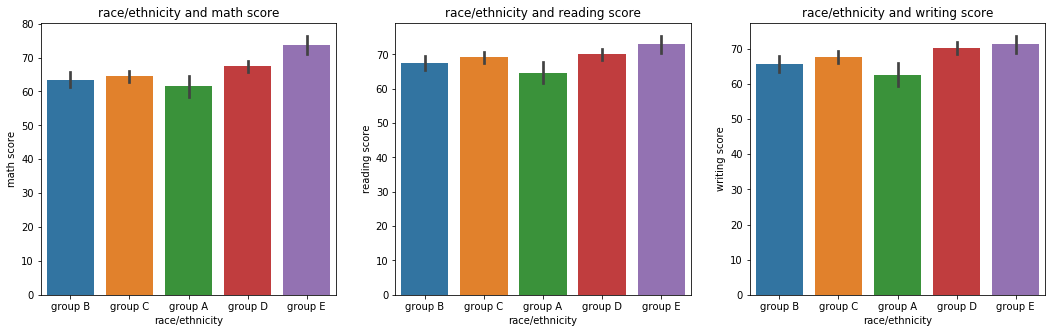

In [66]:
# box plot 

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["race/ethnicity"], df["math score"])
plt.title("race/ethnicity and math score")

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"], df["reading score"])
plt.title("race/ethnicity and reading score")

plt.subplot(1,3,3)
sns.barplot(df["race/ethnicity"], df["writing score"])
plt.title("race/ethnicity and writing score");

In [12]:
df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [18]:
# test whether group differences are significant

race = df["race/ethnicity"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            print("t-test between groups {0} and {1}:".format(race[i], race[j]))
            print(ttest_ind(df[df["race/ethnicity"] == race[i]][var], df[df["race/ethnicity"] == race[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


Parental level of education

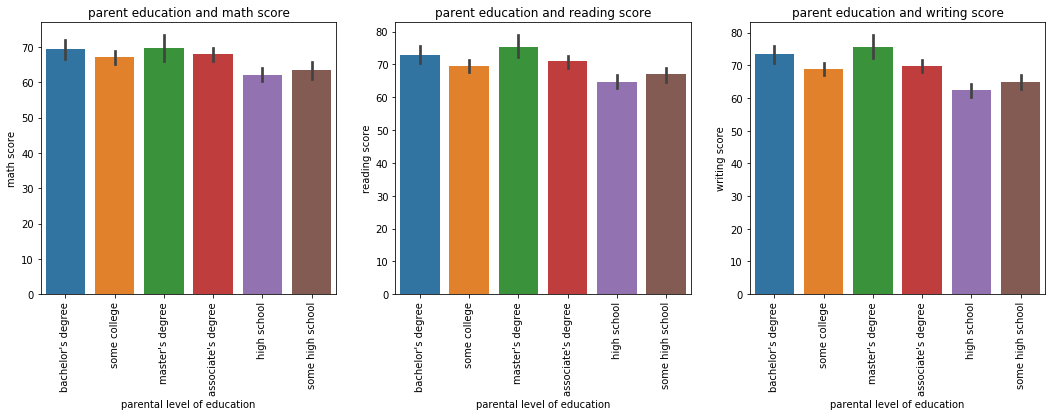

In [67]:
# box plot 

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["parental level of education"], df["math score"])
plt.title("parent education and math score")
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
sns.barplot(df["parental level of education"], df["reading score"])
plt.title("parent education and reading score")
plt.xticks(rotation='vertical')

plt.subplot(1,3,3)
sns.barplot(df["parental level of education"], df["writing score"])
plt.title("parent education and writing score")
plt.xticks(rotation='vertical');

In [15]:
df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [74]:
# Test whether group differences are significant.

ple = df["parental level of education"].unique()
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ple)):
        for j in range(i+1, len(ple)):
            print(
                "t-test between groups {0} and {1}:".format(ple[i], ple[j]))
            print(ttest_ind(df[df["parental level of education"] == ple[i]][var], df[df["parental level of education"]
                == ple[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

-----------------------------------------

2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [21]:
df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [48]:
ttest_ind(df[df["lunch"] == "free/reduced"][["math score", "reading score", "writing score"]],
          df[df["lunch"] == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

------------------------------

3. Does the test preparation course seem to have an effect on the exam performances?

In [25]:
df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [31]:
ttest_ind(df[df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          df[df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

--------------------------------

4. Which 2 exam scores are most correlated with each other?

In [27]:
df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


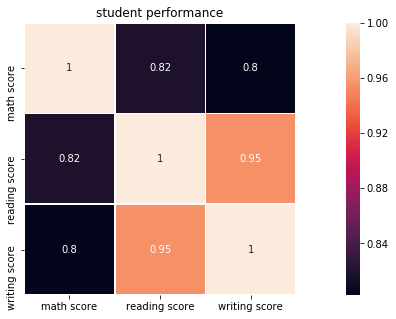

In [60]:
# correlation matrix

corrmat_student = df.corr()

plt.figure(figsize=(18,5))

sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("student performance");